In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def estimate_coef(x, y):
    xmean = np.mean(x)
    ymean = np.mean(y)
    
    xycov = ((x-xmean)*(y-ymean)).sum()
    xvar = ((x-xmean)**2).sum()
    
    a = xycov/xvar
    b = ymean - a*xmean
    
    return a,b

In [3]:
def plot_lines(x, y, coef):
    plt.figure(figsize=(7,7))
    plt.scatter(x, y, c='g')
    
    a,b=coef
    y_pred=a*x + b
    plt.plot(x, y_pred, c='r')

In [4]:
np.random.seed(42)
N = 150
X = 6 * np.random.randn(N) - 3
y = 2*X + np.random.randn(N)*2

In [5]:
coef = estimate_coef(X, y)
coef

(1.9913880557491253, 0.1123696988858871)

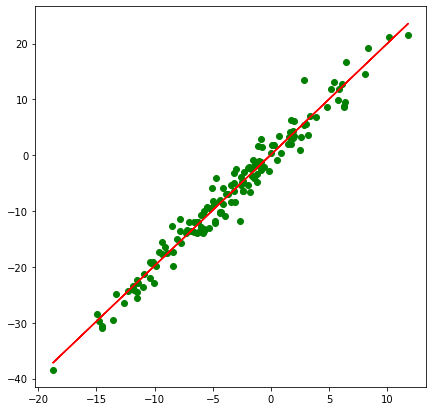

In [6]:
plot_lines(X, y, coef)

In [7]:
from scipy.stats import pearsonr
pearsonr(X, y)

(0.9839362905869267, 1.182107252362632e-112)

### Użycie biblioteki sklearn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X.shape

(150,)

In [10]:
model = LinearRegression()
model.fit(X.reshape(-1,1) , y)

LinearRegression()

In [11]:
model.coef_, model.intercept_

(array([1.99138806]), 0.1123696988858871)

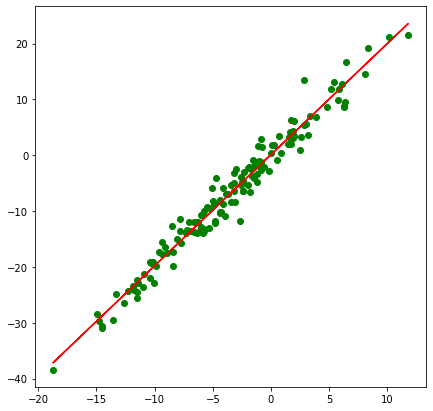

In [12]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [13]:
# metryki dla regresji
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
# obliczenie danych predykcyjnych
y_pred = model.predict(X.reshape(-1,1))

In [15]:
mean_absolute_error(y, y_pred)

1.6007665768345867

In [16]:
mean_squared_error(y, y_pred)

4.145397778686192

In [17]:
r2_score(y, y_pred)

0.9681306239339611

### Efekt lejka

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("http://51.91.120.89/extras/advertising.csv", usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [20]:
X = df.TV.values.reshape(-1,1)
y = df.sales

In [21]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
model.coef_, model.intercept_

(array([0.04753664]), 7.0325935491276965)

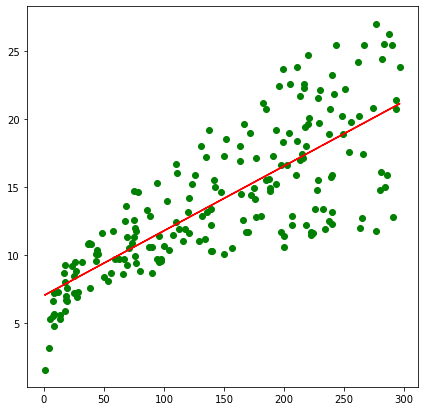

In [23]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [24]:
y_pred = model.predict(X)

In [25]:
r2_score(y, y_pred)

0.611875050850071

In [26]:
df1 = df.query(" TV>=20 and TV<=50 ")
df1

,TV,sales
1,44.5,10.4
12,23.8,9.2
38,43.1,10.1
44,25.1,8.5
66,31.5,9.5
72,26.8,8.8
76,27.5,6.9
91,28.6,7.3
106,25.0,7.2
134,36.9,10.8


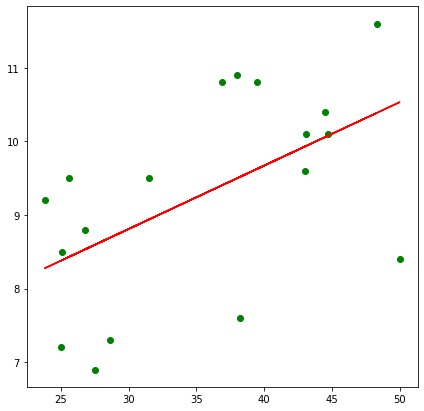

In [27]:
X = df1.TV.values.reshape(-1,1)
y = df1.sales

model = LinearRegression()
model.fit(X, y)

plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [28]:
r2_score(y, model.predict(X) )

0.2949131993229921

In [29]:
df1.corr()

,TV,sales
TV,1.000000,0.543059
sales,0.543059,1.000000


In [30]:
df.corr()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


### Regresja wielomianowa

In [31]:
np.random.seed(0)

X = np.arange(-4, 4.2, 0.2)
y = ((X-2)*(X+4)*(X+1)*(X-1)*(X-3))/14 + np.random.normal(-2.5, 2.5, len(X) )

X = X.reshape(-1,1) # X musi mieć 2 wymiary

In [32]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

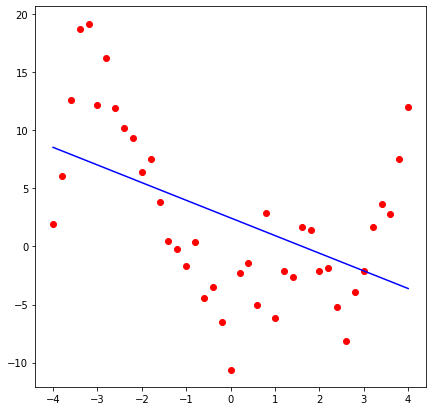

In [33]:
plt.figure(figsize=(7,7))
plt.scatter(X, y, c="r")
plt.plot(X, y_pred, c="b")

In [34]:
r2_score(y, y_pred)

0.2456973012029272

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
pf = PolynomialFeatures(degree=133)
X_poly = pf.fit_transform(X)

In [47]:
X[0]

array([-4.])

In [48]:
X_poly[0]

array([ 1.00000000e+00, -4.00000000e+00,  1.60000000e+01, -6.40000000e+01,
        2.56000000e+02, -1.02400000e+03,  4.09600000e+03, -1.63840000e+04,
        6.55360000e+04, -2.62144000e+05,  1.04857600e+06, -4.19430400e+06,
        1.67772160e+07, -6.71088640e+07,  2.68435456e+08, -1.07374182e+09,
        4.29496730e+09, -1.71798692e+10,  6.87194767e+10, -2.74877907e+11,
        1.09951163e+12, -4.39804651e+12,  1.75921860e+13, -7.03687442e+13,
        2.81474977e+14, -1.12589991e+15,  4.50359963e+15, -1.80143985e+16,
        7.20575940e+16, -2.88230376e+17,  1.15292150e+18, -4.61168602e+18,
        1.84467441e+19, -7.37869763e+19,  2.95147905e+20, -1.18059162e+21,
        4.72236648e+21, -1.88894659e+22,  7.55578637e+22, -3.02231455e+23,
        1.20892582e+24, -4.83570328e+24,  1.93428131e+25, -7.73712525e+25,
        3.09485010e+26, -1.23794004e+27,  4.95176016e+27, -1.98070406e+28,
        7.92281625e+28, -3.16912650e+29,  1.26765060e+30, -5.07060240e+30,
        2.02824096e+31, -

D=2, R2=0.5697544037009782
D=3, R2=0.6700030934995909
D=4, R2=0.7207373198555
D=5, R2=0.8821376701269634
D=6, R2=0.8821777742034193
D=7, R2=0.8831826910348755
D=8, R2=0.8958108344779775
D=9, R2=0.89624163997818
D=10, R2=0.9081113947867436
D=11, R2=0.908154298327959


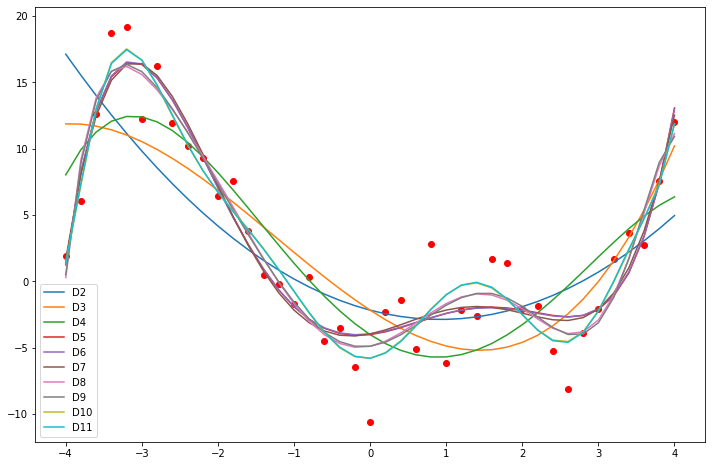

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(X, y, c="r")

for degree in range(2,12): # [5, 23, 51, 126]: 
    pf = PolynomialFeatures(degree)
    X_poly = pf.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    plt.plot(X, y_pred, label=f"D{degree}")
    print(f"D={degree}, R2={r2_score(y, y_pred)}")

plt.legend()
plt.show()